# Prosper Loan Data Exploration

by <b>IfeOluwa Ayoola</b>


This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Data was downloaded from this link: https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

<br>

### Table of Contents
1 <b>Preliminary Wrangling</b>

2 <b>Univariate Exploration</b>
    <li>Numerical Columns</li>
    <li>Categorical Columns</li>
    <li>Time Columns</li>
3 <b>Bivariate Exploration</b>
    <li>Cancelled flights</li>
    <li>Delayed flights</li>
    <li>Summary</li>
4 <b>Multivariate Exploration</b>
    <li>References</li>

### 1. Preliminary Wrangling

In [1]:
# importing stacks and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading data from a CSV file and beginning basic wrangling.

In [3]:
# checking the dataset variables
rawData = pd.read_csv('prosperLoanData.csv')
rawData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
print(rawData.shape)

(113937, 81)


There are 113,937 entries and 81 columns, so we can only evaluate the ones that interest us. The columns of interest are linked to loan amount, status and kind, interest rates, and some demographics about the borrowers.

In [5]:
# Scooping out only the columns of interest.
df_loans = rawData.loc[:,('ListingCreationDate',
                          'DateCreditPulled',
                          'Term',
                          'LoanStatus',
                          'ClosedDate',
                          'BorrowerAPR',
                          'BorrowerRate',
                          'LenderYield',
                          'ProsperRating (Alpha)',
                          'ProsperScore',
                          'ListingCategory (numeric)',
                          'BorrowerState',
                          'Occupation',
                          'EmploymentStatus',
                          'IsBorrowerHomeowner',
                          'AmountDelinquent',
                          'DebtToIncomeRatio',
                          'IncomeRange',
                          'IncomeVerifiable',
                          'StatedMonthlyIncome',
                          'LoanCurrentDaysDelinquent',
                          'LoanFirstDefaultedCycleNumber',
                          'LoanMonthsSinceOrigination',
                          'LoanOriginalAmount',
                          'LoanOriginationDate',
                          'LoanOriginationQuarter',
                          'MonthlyLoanPayment',
                          'LP_ServiceFees',
                          'LP_CollectionFees',
                          'PercentFunded',
                          'Investors' ) ]

In [6]:
# Checking the new table
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ListingCreationDate            113937 non-null  object 
 1   DateCreditPulled               113937 non-null  object 
 2   Term                           113937 non-null  int64  
 3   LoanStatus                     113937 non-null  object 
 4   ClosedDate                     55089 non-null   object 
 5   BorrowerAPR                    113912 non-null  float64
 6   BorrowerRate                   113937 non-null  float64
 7   LenderYield                    113937 non-null  float64
 8   ProsperRating (Alpha)          84853 non-null   object 
 9   ProsperScore                   84853 non-null   float64
 10  ListingCategory (numeric)      113937 non-null  int64  
 11  BorrowerState                  108422 non-null  object 
 12  Occupation                    

Datatype cleaning and resolving the issues found.

In [7]:
# Creating a copy of the dataframe
df_loans_clean = df_loans.copy()

# Editing the Datetime columns
df_loans_clean.ListingCreationDate = pd.to_datetime(df_loans_clean.ListingCreationDate) 
df_loans_clean.DateCreditPulled = pd.to_datetime(df_loans_clean.DateCreditPulled)
df_loans_clean.ClosedDate = pd.to_datetime(df_loans_clean.ClosedDate)
df_loans_clean.LoanOriginationDate = pd.to_datetime(df_loans_clean.LoanOriginationDate)
df_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ListingCreationDate            113937 non-null  datetime64[ns]
 1   DateCreditPulled               113937 non-null  datetime64[ns]
 2   Term                           113937 non-null  int64         
 3   LoanStatus                     113937 non-null  object        
 4   ClosedDate                     55089 non-null   datetime64[ns]
 5   BorrowerAPR                    113912 non-null  float64       
 6   BorrowerRate                   113937 non-null  float64       
 7   LenderYield                    113937 non-null  float64       
 8   ProsperRating (Alpha)          84853 non-null   object        
 9   ProsperScore                   84853 non-null   float64       
 10  ListingCategory (numeric)      113937 non-null  int64         
 11  

In [8]:
# Column renaming
df_loans_clean = df_loans_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory',\
                                                'ProsperRating (Alpha)': 'ProsperRating'})

In [9]:
# Converting the ProsperRating & IncomeRange to an ordinal categorical 
ordinal_var_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],\
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loans_clean[var] = df_loans_clean[var].astype(ordered_var)

# Replacing listing category number by name
cat_num_name = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loans_clean['ListingCategory'] = df_loans_clean['ListingCategory'].map(cat_num_name)

# Adjustment of the datatype for all other categorical columns
df_loans_clean.Occupation = df_loans_clean.Occupation.astype('category')
df_loans_clean.BorrowerState = df_loans_clean.BorrowerState.astype('category')
df_loans_clean.LoanStatus = df_loans_clean.LoanStatus.astype('category')
df_loans_clean.ListingCategory = df_loans_clean.ListingCategory.astype('category')
df_loans_clean.EmploymentStatus = df_loans_clean.EmploymentStatus.astype('category')

In [10]:
# Checking the cleaned table
df_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ListingCreationDate            113937 non-null  datetime64[ns]
 1   DateCreditPulled               113937 non-null  datetime64[ns]
 2   Term                           113937 non-null  int64         
 3   LoanStatus                     113937 non-null  category      
 4   ClosedDate                     55089 non-null   datetime64[ns]
 5   BorrowerAPR                    113912 non-null  float64       
 6   BorrowerRate                   113937 non-null  float64       
 7   LenderYield                    113937 non-null  float64       
 8   ProsperRating                  84853 non-null   category      
 9   ProsperScore                   84853 non-null   float64       
 10  ListingCategory                113937 non-null  category      
 11  

In [11]:
# Saving the cleaned data so that it may be utilized for analysis later
df_loans_clean.to_csv('df_loans_master.csv', index=False)

In [12]:
# Allow full column display for a limited time.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [13]:
# Checking the table
df_loans_clean.head(10)

,ListingCreationDate,DateCreditPulled,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
0,2007-08-26 19:09:29.263,2007-08-26 18:41:46.780,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,Not Available,CO,Other,Self-employed,True,472.0,0.17,"$25,000-49,999",True,3083.333333,0,NaN,78,9425,2007-09-12,Q3 2007,330.43,-133.18,0.0,1.0,258
1,2014-02-27 08:28:07.900,2014-02-27 08:28:14.000,36,Current,NaT,0.12016,0.0920,0.0820,A,7.0,Home Improvement,CO,Professional,Employed,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,NaN,0,10000,2014-03-03,Q1 2014,318.93,0.00,0.0,1.0,1
2,2007-01-05 15:00:47.090,2007-01-02 14:09:10.060,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,Not Available,GA,Other,Not available,False,NaN,0.06,NaN,True,2083.333333,0,NaN,86,3001,2007-01-17,Q1 2007,123.32,-24.20,0.0,1.0,41
3,2012-10-22 11:02:35.010,2012-10-22 11:02:32.000,36,Current,NaT,0.12528,0.0974,0.0874,A,9.0,Motorcycle,GA,Skilled Labor,Employed,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,NaN,16,10000,2012-11-01,Q4 2012,321.45,-108.01,0.0,1.0,158
4,2013-09-14 18:38:39.097,2013-09-14 18:38:44.000,36,Current,NaT,0.24614,0.2085,0.1985,D,4.0,Home Improvement,MN,Executive,Employed,True,0.0,0.26,"$100,000+",True,9583.333333,0,NaN,6,15000,2013-09-20,Q3 2013,563.97,-60.27,0.0,1.0,20
5,2013-12-14 08:26:37.093,2013-12-14 08:26:40.000,60,Current,NaT,0.15425,0.1314,0.1214,B,10.0,Debt Consolidation,NM,Professional,Employed,True,0.0,0.36,"$100,000+",True,8333.333333,0,NaN,3,15000,2013-12-24,Q4 2013,342.37,-25.33,0.0,1.0,1
6,2013-04-12 09:52:56.147,2013-04-12 09:52:53.000,36,Current,NaT,0.31032,0.2712,0.2612,E,2.0,Debt Consolidation,KS,Sales - Retail,Employed,False,0.0,0.27,"$25,000-49,999",True,2083.333333,0,NaN,11,3000,2013-04-18,Q2 2013,122.67,-22.95,0.0,1.0,1
7,2013-05-05 06:49:27.493,2013-05-05 06:49:25.000,36,Current,NaT,0.23939,0.2019,0.1919,C,4.0,Home Improvement,CA,Laborer,Employed,False,0.0,0.24,"$25,000-49,999",True,3355.750000,0,NaN,10,10000,2013-05-13,Q2 2013,372.60,-69.21,0.0,1.0,1
8,2013-12-02 10:43:39.117,2013-12-02 10:43:39.000,36,Current,NaT,0.07620,0.0629,0.0529,AA,9.0,Other,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,NaN,3,10000,2013-12-12,Q4 2013,305.54,-16.77,0.0,1.0,1
9,2013-12-02 10:43:39.117,2013-12-02 10:43:39.000,36,Current,NaT,0.07620,0.0629,0.0529,AA,11.0,Other,IL,Food Service,Employed,True,0.0,0.25,"$25,000-49,999",True,3333.333333,0,NaN,3,10000,2013-12-12,Q4 2013,305.54,-16.77,0.0,1.0,1


In [14]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 40

In [16]:
# Description of the cleaned table
print(df_loans_clean.describe())

                Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       ProsperScore  AmountDelinquent  DebtToIncomeRatio  StatedMonthlyIncome  \
count  84853.000000     106315.000000      105383.000000         1.139370e+05   
mean       5.950067        984.507059           0.275947         5.608026e+03   
std        2.376501       7158.270157           0.551759         7.478497e+03   
min        1.000000          0.000000           0.0000

#### Structure of the dataset
<li>After some basic wrangling, the dataset has 113937 rows and 31 columns.</li>

#### Main features of interest in the dataset.
<li>BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.</li>
<li>ProsperScore: A personalized risk assessment based on past Prosper data. The risk score runs from 1-10, with 10 being the best. Applicable for loans originated after July 2009.</li>

#### Features in the dataset to support the investigation into the feature(s) of interest
<li>LoanOriginalAmount: The origination amount of the loan.</li>
<li>StatedMonthlyIncome: The borrower's reported monthly income at the time the ad was generated.</li>
<li>EmploymentStatus: The employment status of the borrower at the time they posted the listing.</li>
<li>LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.</li>

### 2. Univariate Exploration

#### Numeric Columns

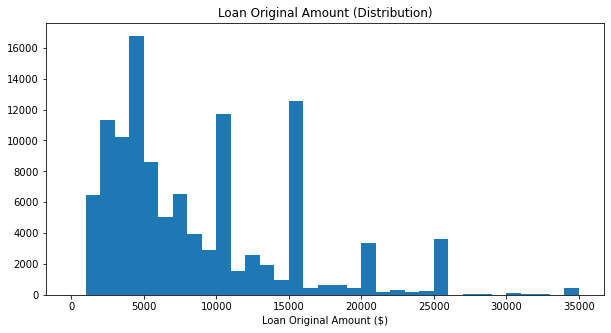

In [19]:
# Chart for loan original amount distribution
binsize = 1000
bins = np.arange(0, df_loans_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount (Distribution)')
plt.show()

Because the distribution has a lengthy tail, let's plot it on a log scale instead.

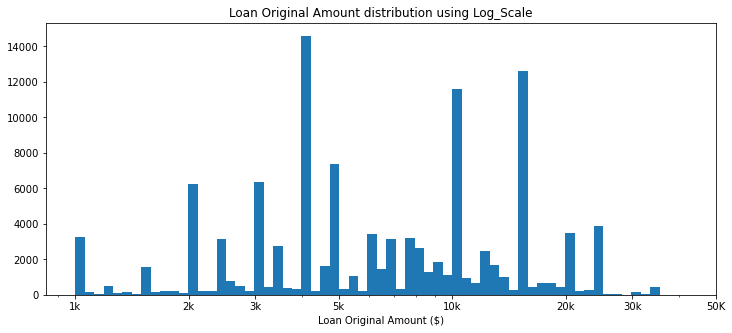

In [23]:
# Plotting the chart on a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount distribution using Log_Scale')
plt.show()

There is a high point between 3,000USD and 5,000USD

In [24]:
#Term of the loan
df_loans_clean.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

It is evident that the loan period is 1, 3, or 5 years.

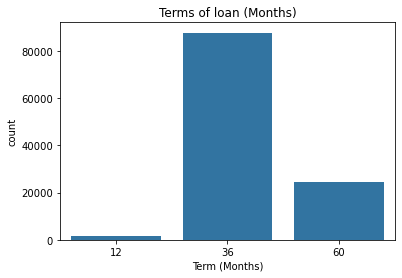

In [26]:
# Chart for the loan period
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans_clean,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

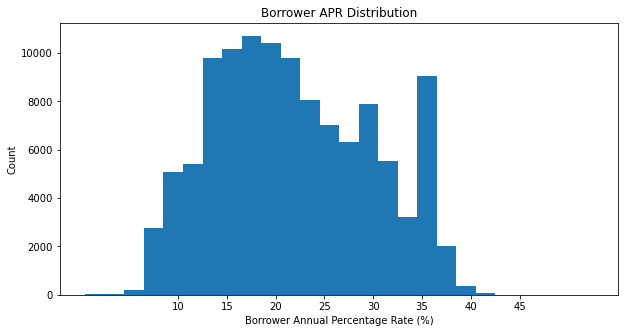

In [27]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = df_loans_clean['BorrowerAPR']*100
bins = np.arange(0.5, df_loans_clean['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plt.title('Borrower APR Distribution')
plt.show()

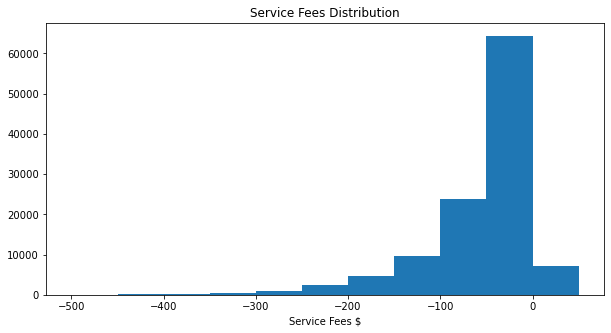

In [28]:
# Service Fees Distribution
binsize = 50
bins = np.arange(-500, df_loans_clean['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.show()

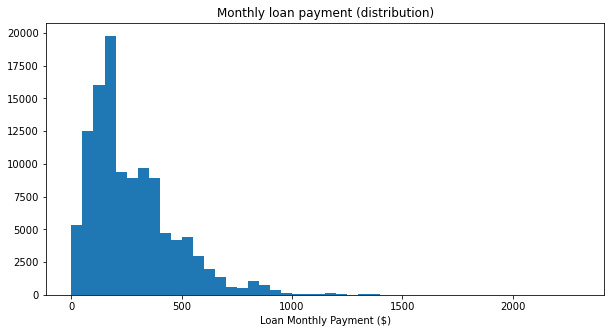

In [29]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.title('Monthly loan payment (distribution)')
plt.show()

Because the distribution has a lengthy tail, let's plot it on a log scale instead.

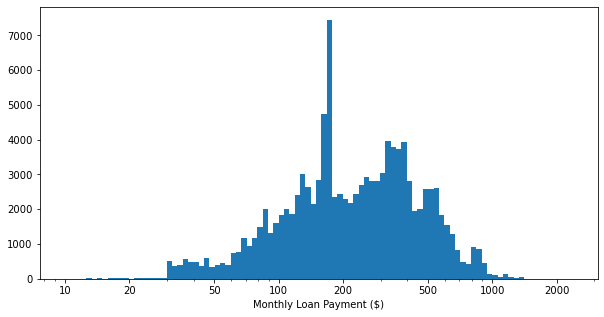

In [31]:
# Plotting on a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans_clean['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.show()

It's fascinating to observe the specifics of the region beneath 500USD and the high point between 100USD and 200USD.

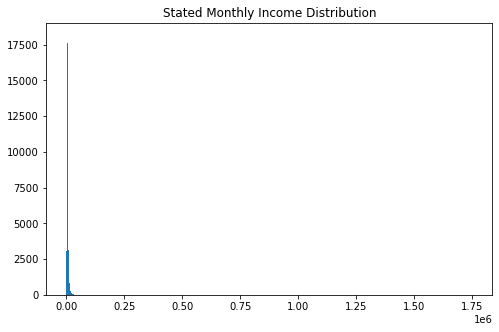

In [32]:
# Chart for the Monthly income distribution
binsize = 1000
bins = np.arange(0, df_loans_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Stated Monthly Income Distribution')
plt.show()

1. Because of the great skewness and the vast outliers beyond 1000,000, no details can be observed, therefore let's look at it in log-scale.
2. It is far preferable to exclude outliers by restricting the x-axis to $50,000.

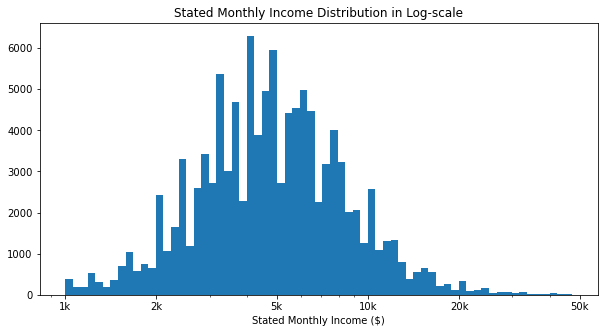

In [33]:
# Plotting with the log-scale
# Truncate the X axis to show only values less than 50k which holds majority of the data
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution in Log-scale')
plt.show()

1. The graph is considerably more fascinating today, with a nearly regular income distribution.
2. It's interesting to observe the high around $5,000.

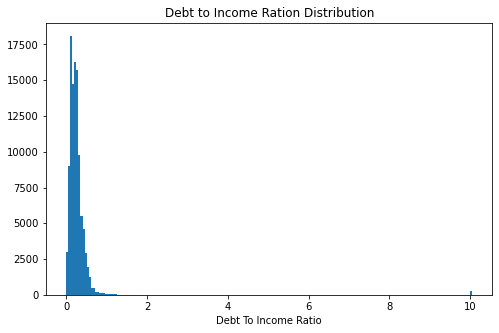

In [34]:
# Dstribution of the Debt to Income Ration
binsize = 0.05
bins = np.arange(0, df_loans_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.title('Debt to Income Ration Distribution')
plt.show()

1. DebtToIncomeRatio has a range of 0-10, with the majority of values falling between 0.14 and 0.33. All values greater than one are considered outliers.
2. It is preferable to test it in log-scale without outliers.

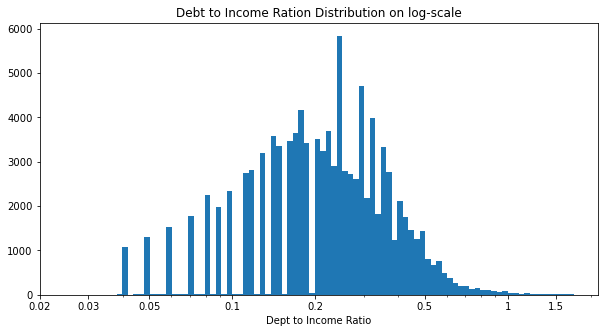

In [36]:
#Debt to Income Ration Distribution with log scale and truncate to values less than 1.8
log_binsize = 0.02
bins = 10 ** np.arange(-1.5, 0.25, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([2e-2, 3e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 1.5], ['0.02','0.03', '0.05', '0.1', '0.2', '0.5', '1', '1.5'])
plt.xlabel('Dept to Income Ratio')
plt.title('Debt to Income Ration Distribution on log-scale')

plt.show()

### 3. Categorical Columns

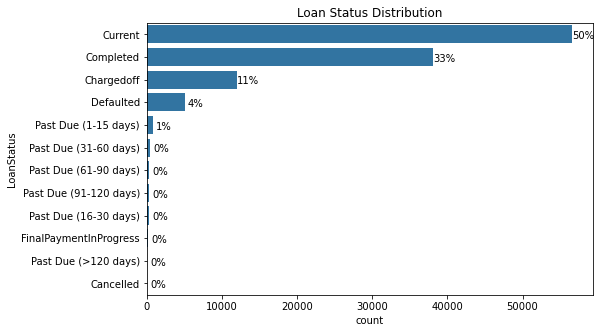

In [37]:
# Showing the Loan Status Distribution
status_order = df_loans_clean['LoanStatus'].value_counts().index

plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,y='LoanStatus',color=base_color,order=status_order);
plt.title('Loan Status Distribution')

# Adding annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# Looping through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Getting the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # Printing the annotation just below the top of the bar
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

Majority of the loans are Current

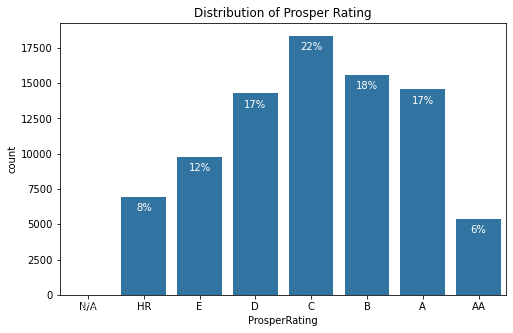

In [41]:
# Prosper Rating Distribution

plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x='ProsperRating',color=base_color);
plt.title('Distribution of Prosper Rating')

# Adding annotations
n_points = df_loans_clean[df_loans_clean.ProsperRating.isna() == False].shape[0]
cat_counts = df_loans_clean['ProsperRating'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# Looping through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Getting the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # Printing the annotation just below the top of the bar
    plt.text(loc,  count-1000, pct_string, ha = 'center', color = 'w');

The above implies that majority of the borrowers get Prosper Rating of 'C'

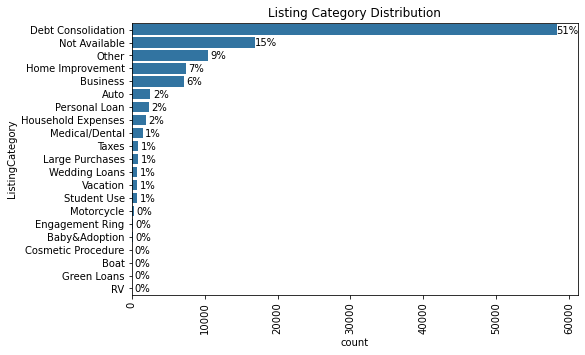

In [42]:
#Listing of the Category Distrobution
cat_order = df_loans_clean.ListingCategory.value_counts().index
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,y='ListingCategory',color=base_color, order=cat_order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=90)

# Adding annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['ListingCategory'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# Looping through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Getting the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # Printing the annotation just below the top of the bar
    plt.text(count+1400, loc+0.3,  pct_string, ha = 'center', color = 'black');

It appears that many people take out loans to pay off other loans.

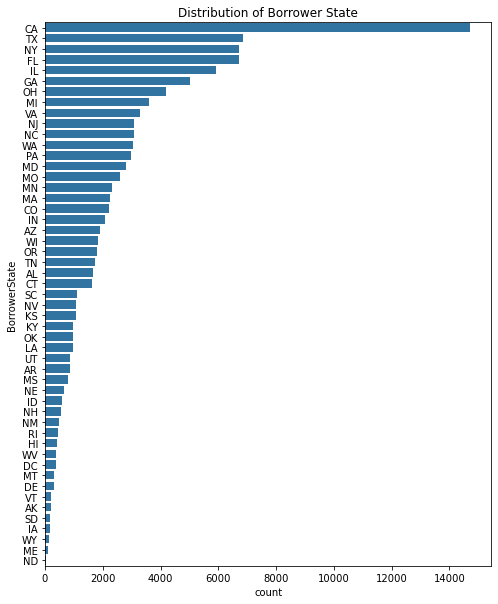

In [44]:
# Distrobution of the Borrower State 
cat_order = df_loans_clean.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sb.countplot(data=df_loans_clean,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Distribution of Borrower State');

California, Texas, and New York had the most loans originated during that time period.

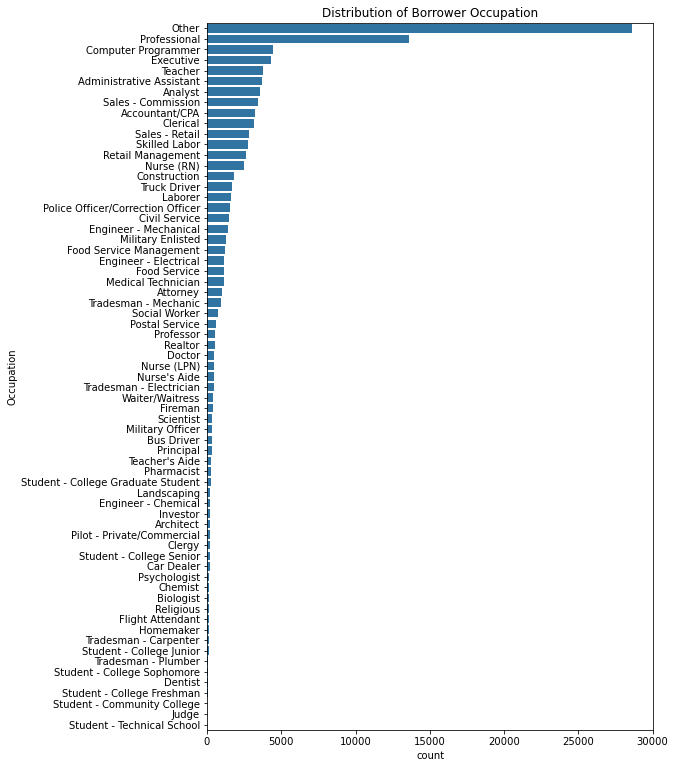

In [45]:
# Distribution of the Borrower Occupation
cat_order = df_loans_clean.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sb.countplot(data=df_loans_clean,y='Occupation',color=base_color, order=cat_order);
plt.title('Distribution of Borrower Occupation');

1. Professional, Computer Engineer, and Executive are the most common vocations among borrowers (excluding those in the other category).
2. It is noteworthy to see that students, judges, dentists, and biologists are the jobs with the fewest loans.

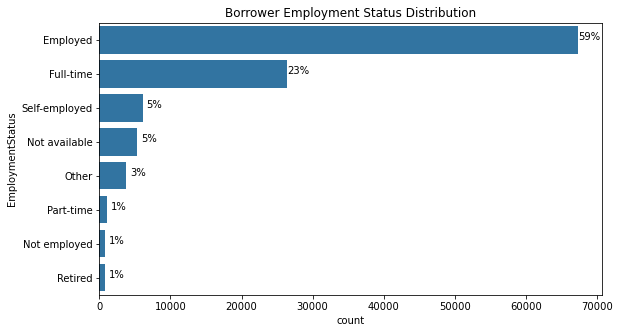

In [47]:
# Distrobution of Borrower Employment Status
cat_order = df_loans_clean.EmploymentStatus.value_counts().index
plt.figure(figsize=[9, 5])
sb.countplot(data=df_loans_clean,y='EmploymentStatus',color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

# Adding annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# Looping through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Getting the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # Printing the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

Obviously, majority of the loan takers are employed and this is logical

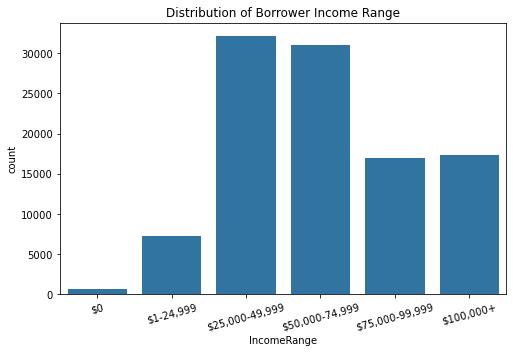

In [49]:
# Distrobution of Borrower Income Range Status
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x='IncomeRange',color=base_color);
plt.title('Distribution of Borrower Income Range')
plt.xticks(rotation=15);

The above implies that people with yearly income range of 25,000-49,999USD are the hightest loans takers

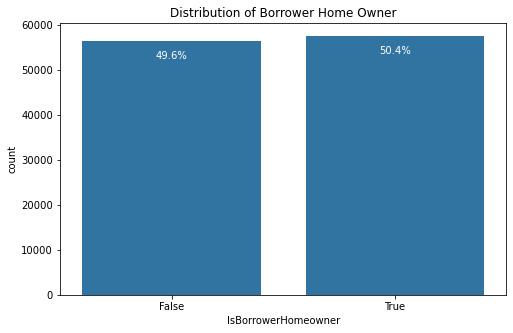

In [50]:
# Distrobution of Borrower-Homeowner Status
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sb.color_palette()[0]
sb.countplot(data = df_loans_clean, x = 'IsBorrowerHomeowner', color = base_color)

# Adding annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['IsBorrowerHomeowner'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# Looping through each pair of locations and labels
for loc, label in zip(locs, labels):

    # Getting the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # Printing the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

plt.title('Distribution of Borrower Home Owner');

It can be deduced that owning a house or not has no effect to taking loans

#### Time Columns

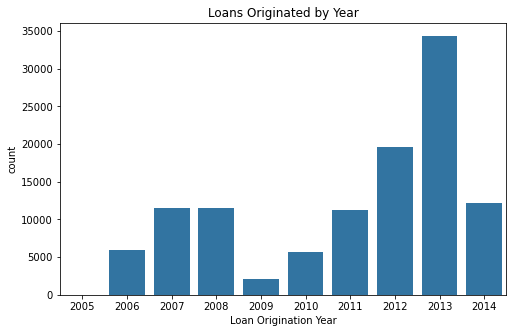

In [51]:
# How Loan Originates by Year
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x=df_loans_clean['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

Given the 2008 crisis, there was a dip in loan origination in 2009, which subsequently began to rebound.

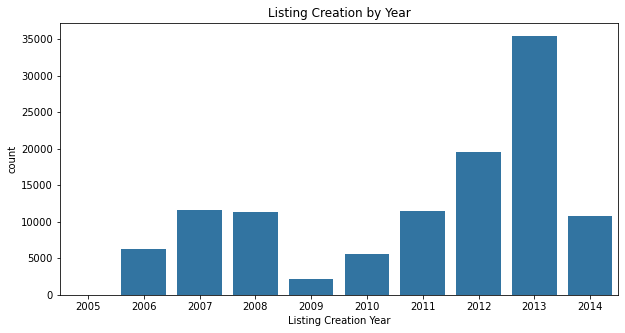

In [53]:
# List of Creation by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans_clean,x=df_loans_clean['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

This is correlating with the previous chart.

#### Discussion of Findings from the Distribution(s) of Variable(s) of Interest
1. Other than updating the data types of some variables, no transformations were required. Also, after charting, it was discovered that some characteristics, such as IncomeRange, should be converted to 'Categorical,' while others, such as ProsperScore, are nearly set to particular values, but prefered to maintain in numeric format so that it may be used for calculations such as average if needed.

2. There are certain outliers in the StatedMonthlyIncome that are too far apart from the majority of the numbers; these outliers are identified in various charts by restricting the axis values.

#### Operations performed to Tidy the Data Form
Some features had long-tailed, skewed distributions, these were checked on a log-scale which revealed the hidden distribution in some areas.

### 3. Bivariate Exploration
In order to study variables in pairs, we must first define numeric and categorical characteristics in order to choose the appropriate chart type.

In [55]:
#Creating lists for numeric and categorical variables
numeric_vars =['Term', 'BorrowerAPR', 'LenderYield', 'ProsperScore', 'AmountDelinquent', 'DebtToIncomeRatio',\
               'StatedMonthlyIncome','LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment',\
               'LP_ServiceFees', 'Investors']
categoric_vars = ['LoanStatus', 'ProsperRating', 'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',\
                  'IncomeRange']

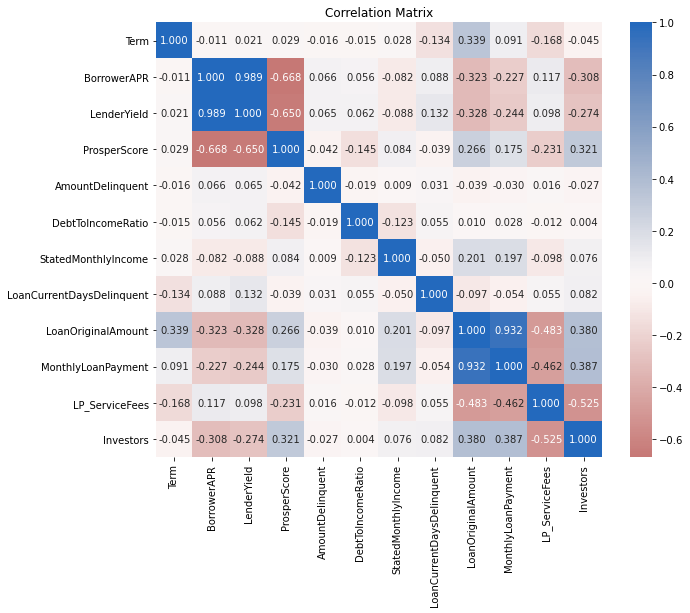

In [56]:
# Chart for Correlation matrix for all numerical variables
plt.figure(figsize = [10, 8])
sb.heatmap(df_loans_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

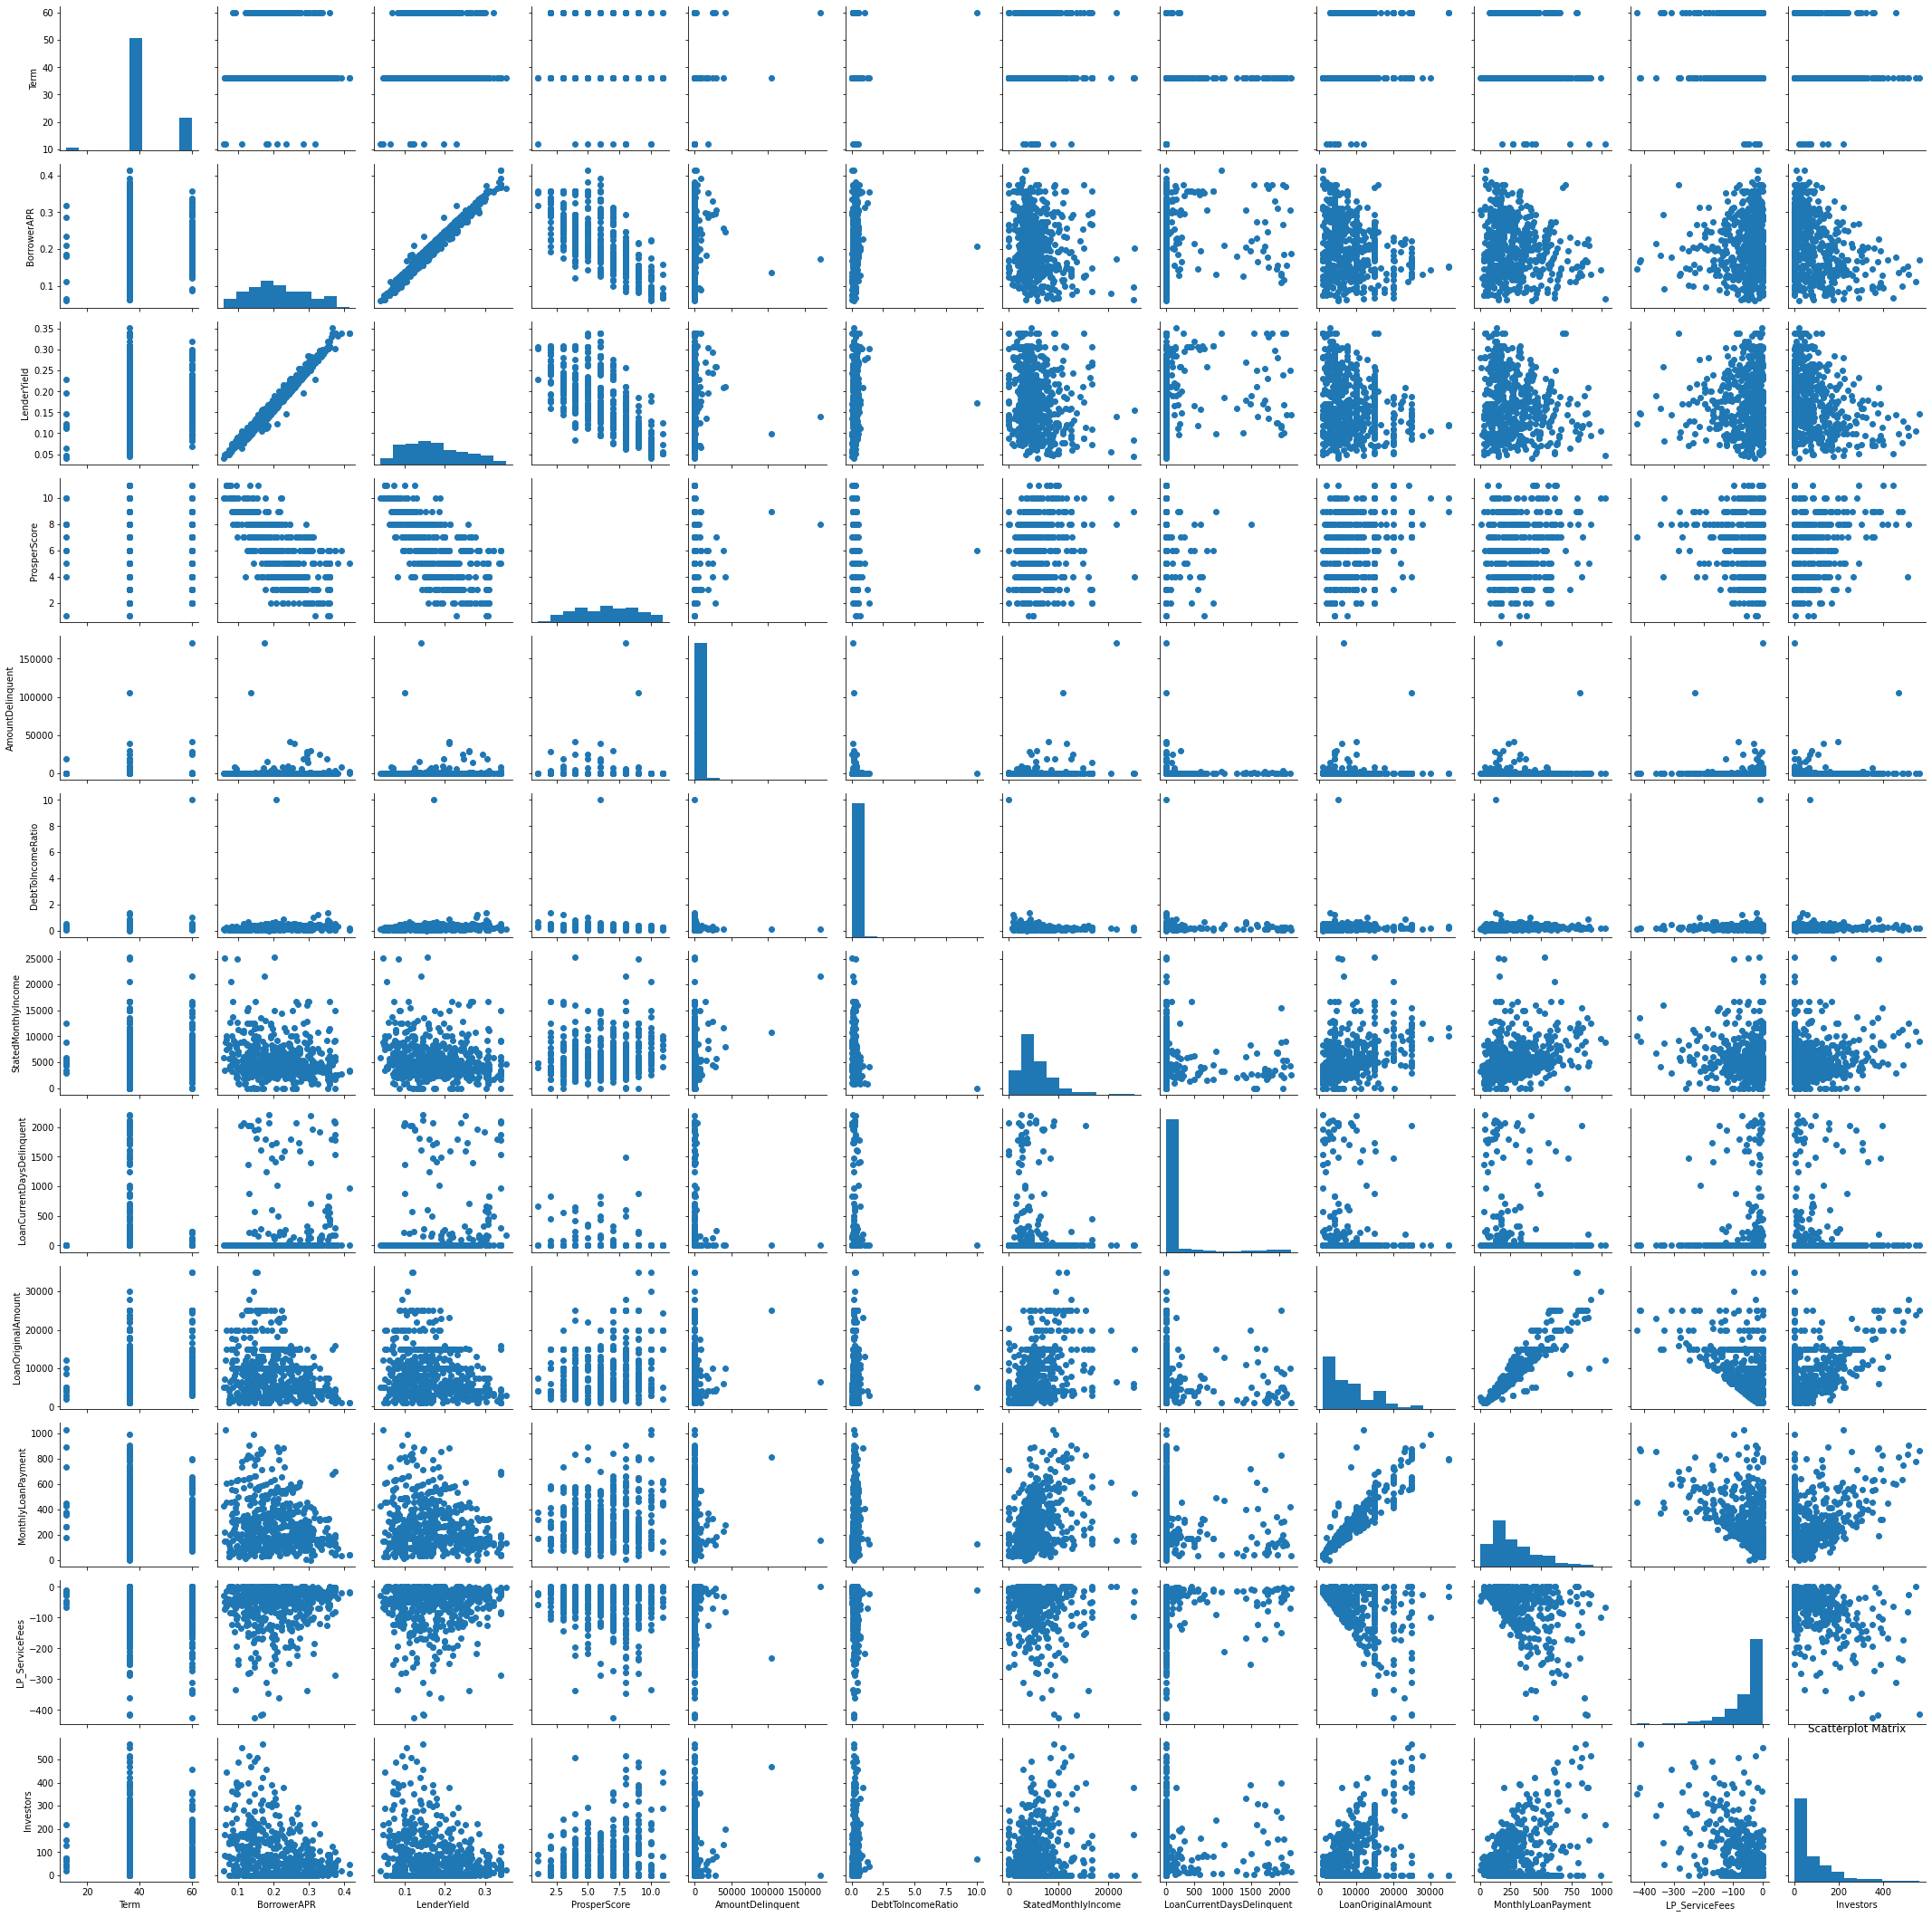

In [57]:
# Taking a sample of 600 loans 
samples = np.random.choice(df_loans_clean.shape[0], 600, replace = False)
loans_samp = df_loans_clean.loc[samples,:]

# Building a grid of scatter plots
g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10)
plt.title('Scatterplot Matrix');

1. There are several interesting relationships based on the correlation matrix and scatter plots above:

<li>LenderYield and BorrowerAPR: Strong positive connection, which makes obvious because the greater the rate, the more the lender gets.</li>
<li>LoanOriginalAmount and MonthlyLoanPayment: A strong positive association exists, which makes obvious given that the larger the loan, the larger the monthly payments.</li>
<li>BorrowerAPR and ProsperScore have a negative association; a lower score indicates more risks and hence higher interest rates.</li>
<li>LenderYield and ProsperScore have a negative connection, which makes sense because the better the score, the lower the interest rate and hence the lower the lender yield.</li>
<li>LoanOriginalAmount and BorrowerAPR have a negative connection; the larger the loan amount, the lower the interest rate.</li>

<br>
2. The following graphs investigate some of these connections.

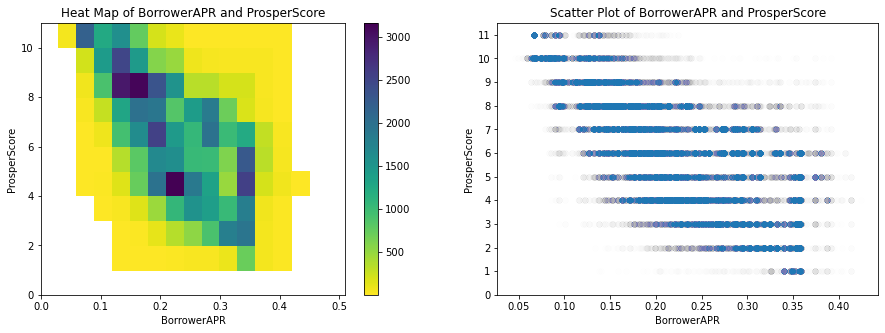

In [58]:
# The relationship between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loans_clean['BorrowerAPR'].max()+0.02, 0.03)
bins_y = np.arange(0, df_loans_clean['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loans_clean, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = df_loans_clean, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

There exist a negative relationship, a lower ProsperScore leads to higher borrower rate; which is logically reasonable.

### 4. Multivariate Exploration
It was discovered that if EmploymentStatus is Not Available, the ProsperScore is NaN; we will try to take this into account in several charts.

In [59]:
df_loans_clean[df_loans_clean['EmploymentStatus'] == 'Not available'].head()[['EmploymentStatus','ProsperScore']]

,EmploymentStatus,ProsperScore
2,Not available,NaN
17,Not available,NaN
42,Not available,NaN
63,Not available,NaN
76,Not available,NaN


In [60]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

C:\Users\BCT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


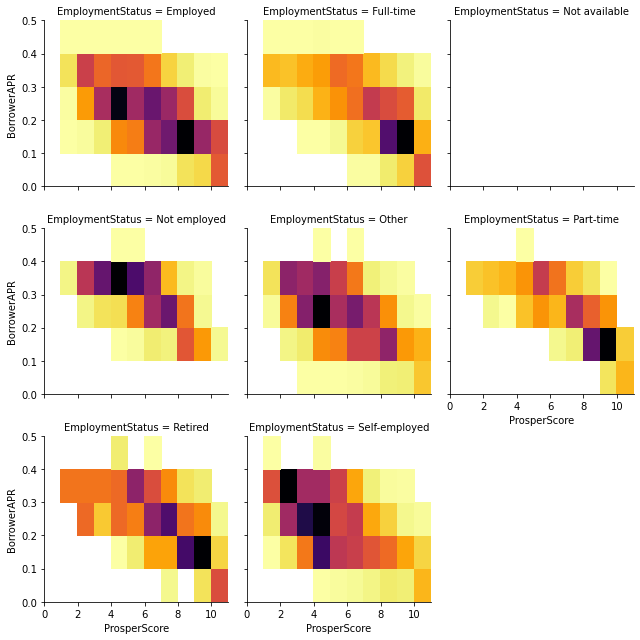

In [61]:
# creating a faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = df_loans_clean[df_loans_clean['EmploymentStatus'] != 'Not available'],\
                 col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');

The following are some interesting facts regarding the heatmaps shown above:
<li>Employed folks differ in terms of ProsperScore and BorrowerAPR.</li>
<li>Full-time and part-time workers typically have a higher ProsperScore and a lower BorrowerAPR.</li>
<li>Borrowers who are neither employed or self-employed have a lower ProsperScore and a higher BorrowerAPR.</li>
<li>People who are retired have a better ProsperScore and a lower BorrowerAPR.</li>

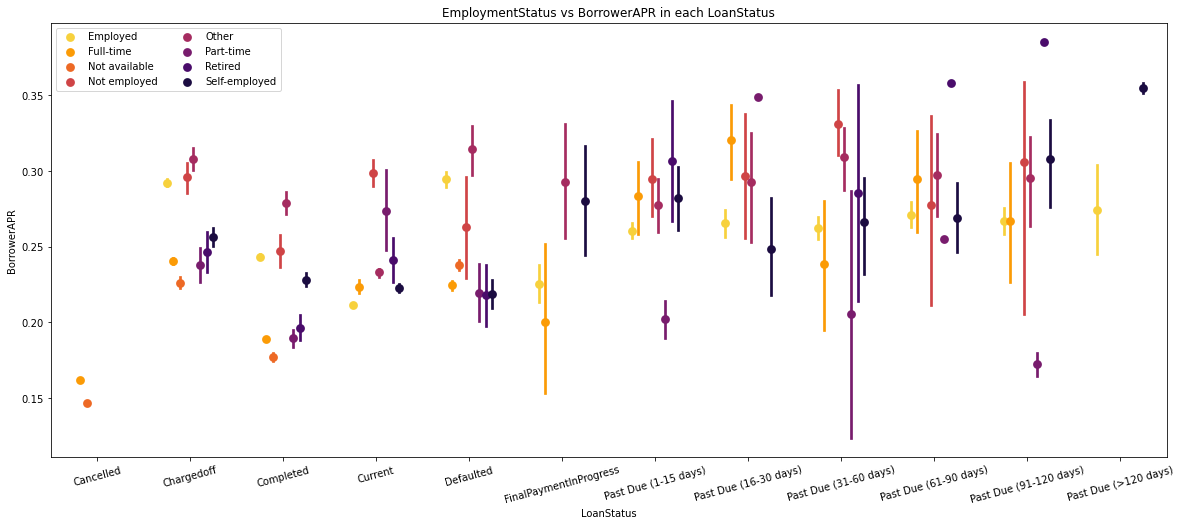

In [62]:
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loans_clean, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

In general, interest rates on past-due loans are greater in all job situations.

#### Observed Relationships
1. Employed folks differ in terms of ProsperScore and BorrowerAPR.

2. Full-time and part-time workers typically have a higher ProsperScore and a lower BorrowerAPR.

3. Borrowers who are neither employed or self-employed have a lower ProsperScore and a higher BorrowerAPR.

4. People who are retired have a better ProsperScore and a lower BorrowerAPR.

#### Interactions between Features
It was vital to note that customers with higher ProsperScores tend to take out loans with greater LoanOriginalAmount.